In [43]:
# import data 
import numpy as np
import pandas as df
np_folder = 'PRSA_preprocess/PRSA_Wanshouxigong_numpy'
np_split = np_folder.split('/')
np_file = np_split[1]
splitter = np_file.split('_')
display_name = splitter[0] + '_' + splitter[1]
print(np_file)
print(display_name)
hi = np.load('PRSA_preprocess/' + np_file + '.npy', allow_pickle=True)

dataframeee = df.DataFrame(hi)
dataframeee.columns = ['No', 'year', 'month','day', 'hour','PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
dataframeee.to_csv(display_name + '.csv', index=False) # comma separated

PRSA_Wanshouxigong_numpy
PRSA_Wanshouxigong


In [44]:
import pandas as pd
from datetime import datetime
import io

# load data
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
 
# dataset = pd.read_csv(io.BytesIO(uploaded[hello]),  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset = pd.read_csv(display_name + '.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
dataset.drop('PM10', axis=1, inplace=True)
dataset.drop('SO2', axis=1, inplace=True)
dataset.drop('CO', axis=1, inplace=True)
dataset.drop('NO2', axis=1, inplace=True)
dataset.drop('O3', axis=1, inplace=True)
# for now drop station
dataset.drop('station', axis=1, inplace=True)
dataset.index.name = 'date'

print(dataset)

                     PM2.5  TEMP    PRES  DEWP  RAIN     wd  WSPM
date                                                             
2013-03-01 00:00:00    9.0   0.3  1021.9 -19.0   0.0  292.5   2.0
2013-03-01 01:00:00   11.0  -0.1  1022.4 -19.3   0.0  292.5   4.4
2013-03-01 02:00:00    8.0  -0.6  1022.6 -19.7   0.0  292.5   4.7
2013-03-01 03:00:00    8.0  -0.7  1023.5 -20.9   0.0  315.0   2.6
2013-03-01 04:00:00    8.0  -0.9  1024.1 -21.7   0.0  292.5   2.5
...                    ...   ...     ...   ...   ...    ...   ...
2017-02-28 19:00:00   11.0  12.5  1013.5 -16.2   0.0  315.0   2.4
2017-02-28 20:00:00   13.0  11.6  1013.6 -15.1   0.0  292.5   0.9
2017-02-28 21:00:00   14.0  10.8  1014.2 -13.3   0.0  315.0   1.1
2017-02-28 22:00:00   12.0  10.5  1014.4 -12.9   0.0  337.5   1.2
2017-02-28 23:00:00   13.0   8.6  1014.1 -15.9   0.0   22.5   1.3

[35064 rows x 7 columns]


In [45]:
# mark all NA values with 0
dataset['PM2.5'].fillna(0, inplace=True)
# drop the first 24 hours
#dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))

# save to file
dataset.to_csv(display_name + '_pollution.csv')

                     PM2.5  TEMP    PRES  DEWP  RAIN     wd  WSPM
date                                                             
2013-03-01 00:00:00    9.0   0.3  1021.9 -19.0   0.0  292.5   2.0
2013-03-01 01:00:00   11.0  -0.1  1022.4 -19.3   0.0  292.5   4.4
2013-03-01 02:00:00    8.0  -0.6  1022.6 -19.7   0.0  292.5   4.7
2013-03-01 03:00:00    8.0  -0.7  1023.5 -20.9   0.0  315.0   2.6
2013-03-01 04:00:00    8.0  -0.9  1024.1 -21.7   0.0  292.5   2.5


In [46]:
from matplotlib import pyplot
# load dataset
dataset = pd.read_csv(display_name + '_pollution.csv', header=0, index_col=0)

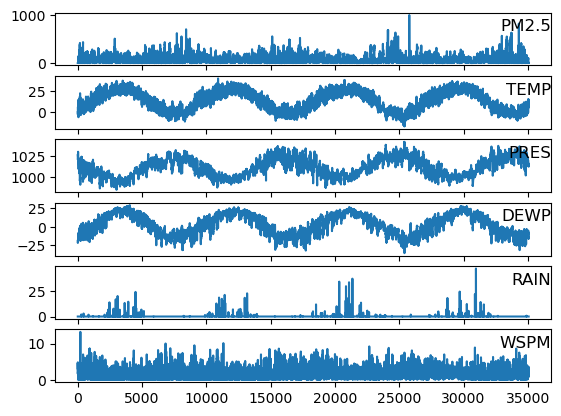

In [47]:
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3,  4, 6]
i = 1
# plot each column
pyplot.figure()
for group in groups:
  pyplot.subplot(len(groups), 1, i)
  #print("i: " + str(i) + ", " + str(values[:,group]))
  pyplot.plot(values[:, group])
  pyplot.title(dataset.columns[group], y=0.5, loc='right')
  i += 1
pyplot.show()

In [48]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [49]:
# Preprocessing
# integer encode direction
encoder = LabelEncoder()
values[:,5] = encoder.fit_transform(values[:,5])

#print(values[:,5])
# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
#print(scaled[:,5])
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1) #(48, 24)

# drop columns we don't want to predict
# drop next hour stats for meteorological keep PM data
reframed.drop(reframed.columns[[8, 9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.006024   0.297909   0.646748   0.255486        0.0   0.957447   
2   0.008032   0.290941   0.655537   0.250784        0.0   0.957447   
3   0.005020   0.282230   0.659050   0.244514        0.0   0.957447   
4   0.005020   0.280488   0.674868   0.225705        0.0   0.989362   
5   0.005020   0.277003   0.685411   0.213166        0.0   0.957447   

   var7(t-1)   var1(t)  
1   0.151515  0.008032  
2   0.333333  0.005020  
3   0.356061  0.005020  
4   0.196970  0.005020  
5   0.189394  0.007028  


In [50]:
# Define and Fit Model
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24 * 3
# only take in the first 365 days
train = values[:n_train_hours, :]

# rest is test data
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# around 9k hours of training, 26k hours of testing

(26280, 1, 7) (26280,) (8783, 1, 7) (8783,)


In [51]:
# Create BiLSTM Model
import tensorflow as tf

# design network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(tf.keras.layers.Dense(1))


Epoch 1/50
292/292 [==============================] - 5s 5ms/step - loss: 0.0785 - val_loss: 0.0780
Epoch 2/50
292/292 [==============================] - 1s 3ms/step - loss: 0.0627 - val_loss: 0.0638
Epoch 3/50
292/292 [==============================] - 1s 3ms/step - loss: 0.0497 - val_loss: 0.0478
Epoch 4/50
292/292 [==============================] - 1s 4ms/step - loss: 0.0358 - val_loss: 0.0333
Epoch 5/50
292/292 [==============================] - 1s 4ms/step - loss: 0.0243 - val_loss: 0.0221
Epoch 6/50
292/292 [==============================] - 1s 4ms/step - loss: 0.0203 - val_loss: 0.0198
Epoch 7/50
292/292 [==============================] - 1s 3ms/step - loss: 0.0196 - val_loss: 0.0191
Epoch 8/50
292/292 [==============================] - 1s 4ms/step - loss: 0.0195 - val_loss: 0.0188
Epoch 9/50
292/292 [==============================] - 1s 3ms/step - loss: 0.0194 - val_loss: 0.0187
Epoch 10/50
292/292 [==============================] - 1s 3ms/step - loss: 0.0193 - val_loss: 0.0187

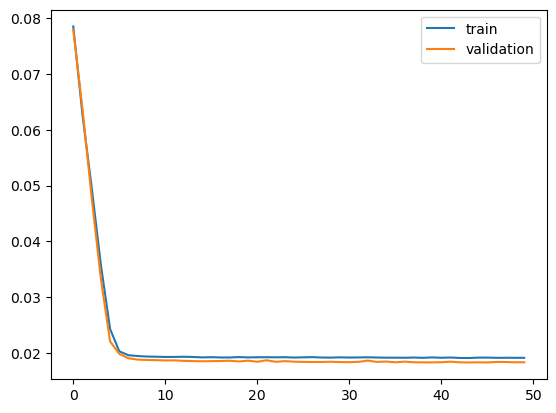

In [52]:
import keras
from keras import backend as K

input_shape = train_X.shape[1:]
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


model.compile(
    loss=root_mean_squared_error, 
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)

# fit network
history = model.fit(
    train_X, 
    train_y, 
    epochs=50, 
    batch_size=72,
    validation_split=0.2
)

print("rmse on test")
model.evaluate(test_X, test_y, verbose=1)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [53]:
model.save('Bi-LSTM_models/' + display_name)

INFO:tensorflow:Assets written to: Bi-LSTM_models/PRSA_Wanshouxigong/assets


INFO:tensorflow:Assets written to: Bi-LSTM_models/PRSA_Wanshouxigong/assets
